<a href="https://colab.research.google.com/github/OmPShinde/DC-Micro-Project/blob/main/FSK_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter sensor value (0-255): 200
Sensor Value: 200
Binary Representation: 11001000
Data Bits: [1 1 0 0 1 0 0 0]


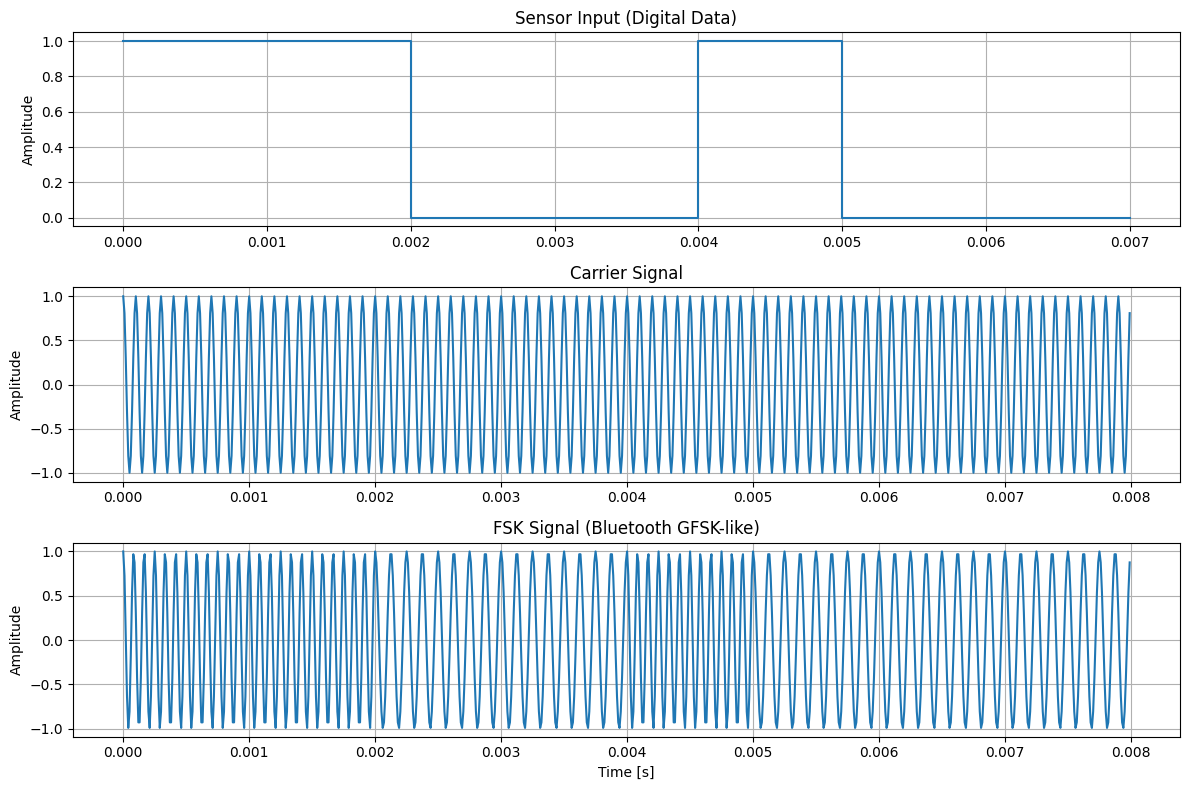

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------- Parameters -------------------
Tb = 1e-3        # Bit duration (s)
Fs = 100e3       # Sampling frequency (Hz)
fc = 10e3        # Carrier frequency (Hz)
fdev = 2e3       # Frequency deviation for FSK

# ------------------- Take Sensor Value Input -------------------
sensor_value = int(input("Enter sensor value (0-255): "))

# ------------------- Convert Sensor Value to 8-bit Binary -------------------
binary_str = np.binary_repr(sensor_value, width=8)
data_bits = np.array(list(map(int, binary_str)))

# ------------------- Print Values -------------------
print("Sensor Value:", sensor_value)
print("Binary Representation:", binary_str)
print("Data Bits:", data_bits)

# ------------------- Time Vector -------------------
t = np.arange(0, Tb*len(data_bits), 1/Fs)

# ------------------- Data Signal -------------------
data_signal = np.repeat(data_bits, int(Tb*Fs))

# ------------------- Carrier Signal -------------------
carrier = np.cos(2 * np.pi * fc * t)

# ------------------- FSK Modulation -------------------
fsk_signal = np.cos(2 * np.pi * (fc + fdev*(2*data_signal-1)) * t)

# ------------------- Plotting -------------------
plt.figure(figsize=(12,8))

# Original Data
plt.subplot(3,1,1)
plt.step(np.arange(len(data_bits))*Tb, data_bits, where='post')
plt.title("Sensor Input (Digital Data)")
plt.ylabel("Amplitude")
plt.grid(True)

# Carrier Signal
plt.subplot(3,1,2)
plt.plot(t, carrier)
plt.title("Carrier Signal")
plt.ylabel("Amplitude")
plt.grid(True)

# FSK Signal
plt.subplot(3,1,3)
plt.plot(t, fsk_signal)
plt.title("FSK Signal (Bluetooth GFSK-like)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

